In [18]:
import pandas as pd  

In [19]:
df = pd.read_csv("data-transaksi2.csv")

In [20]:
df.head(10)

,Transaction,Item,date_time
0,1,tempat_tidur_laci,2024-01-05
1,2,tempat_tidur_twin_120,2024-01-09
2,3,tempat_tidur_160,2024-01-25
3,4,tempat_tidur_120,2024-01-19
4,5,tempat_tidur_140,2024-01-30
5,6,_set_tamu_2111,2024-01-30
6,7,_set_tamu_2111,2024-01-11
7,7,tempat_tidur_160,2024-01-05
8,8,tempat_tidur_160,2024-01-23
9,9,meja_minimalis_kamar,2024-01-10


In [21]:
from mlxtend.frequent_patterns import association_rules, apriori

In [22]:
item_count = df.groupby(["Transaction", "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,tempat_tidur_laci,1
1,2,tempat_tidur_twin_120,1
2,3,tempat_tidur_160,1
3,4,tempat_tidur_120,1
4,5,tempat_tidur_140,1
5,6,_set_tamu_2111,1
6,7,_set_tamu_2111,1
7,7,tempat_tidur_160,1
8,8,tempat_tidur_160,1
9,9,lemari_2pintugeser,1


In [23]:
item_count_pivot = item_count.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Dataset :",item_count_pivot.shape)
item_count_pivot.head()

Ukuran Dataset : (567, 87)


Item,__meja_tv_150,_kursi_bale_jati,_kursi_males,_kursi_tamu_jati_minimalis,_lemari_makan,_lemari_sudut,_meja_rias,_meja_tamu+buku,_meja_tv_100,_meja_tv_150,...,tempat_tidur_laci_140R,tempat_tidur_laci_180,tempat_tidur_laci_180L,tempat_tidur_laci_180R,tempat_tidur_laci_200,tempat_tidur_laci_200L,tempat_tidur_laci_90,tempat_tidur_twin_100,tempat_tidur_twin_120,tempat_tidur_twin_90
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head

<bound method NDFrame.head of Item         __meja_tv_150  _kursi_bale_jati  _kursi_males  \
Transaction                                                  
1                        0                 0             0   
2                        0                 0             0   
3                        0                 0             0   
4                        0                 0             0   
5                        0                 0             0   
...                    ...               ...           ...   
640                      0                 0             0   
641                      0                 0             0   
642                      0                 0             0   
643                      0                 0             0   
646                      0                 0             0   

Item         _kursi_tamu_jati_minimalis  _lemari_makan  _lemari_sudut  \
Transaction                                                             
1                

In [25]:
print("Ukuran Dataset: ", item_count_pivot.shape)
print("Jumlah Transaksi: ", item_count_pivot.shape[0])
print("Jumlah Items: ", item_count_pivot.shape[1])

Ukuran Dataset:  (567, 87)
Jumlah Transaksi:  567
Jumlah Items:  87


In [26]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d')
# df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

In [27]:
df['year_month_day'] = df['date_time'].dt.to_period('D')

In [28]:


daily_transactions = df.groupby('year_month_day')['Transaction'].nunique().reset_index()

daily_transactions.columns = ['date', 'unique_transactions']


print(daily_transactions)


specific_day = '2024-01-01'
total_unique_transactions_specific_day = daily_transactions[daily_transactions['date'] == specific_day]['unique_transactions'].sum()
print(f"Total unique transactions on {specific_day}: {total_unique_transactions_specific_day}")


           date  unique_transactions
0    2024-01-01                    5
1    2024-01-02                    4
2    2024-01-03                    7
3    2024-01-04                    4
4    2024-01-05                    3
..          ...                  ...
170  2024-06-25                    2
171  2024-06-26                    4
172  2024-06-27                    8
173  2024-06-28                    4
174  2024-06-29                    7

[175 rows x 2 columns]
Total unique transactions on 2024-01-01: 5


In [29]:
specific_day = '2024-01-01'
total_unique_transactions_specific_day = daily_transactions[daily_transactions['date'] == specific_day]['unique_transactions'].sum()
print(f"Total unique transactions on {specific_day}: {total_unique_transactions_specific_day}")

# Checking the total unique transactions for each month to ensure data integrity
df['year_month'] = pd.to_datetime(df['date_time']).dt.to_period('M')
monthly_transactions = df.groupby('year_month')['Transaction'].nunique().reset_index()
monthly_transactions.columns = ['year_month', 'unique_transactions']

# Displaying the dataframes
print("Daily Unique Transactions:")
print(daily_transactions.head())

print("Monthly Unique Transactions:")
print(monthly_transactions.head())

Total unique transactions on 2024-01-01: 5
Daily Unique Transactions:
         date  unique_transactions
0  2024-01-01                    5
1  2024-01-02                    4
2  2024-01-03                    7
3  2024-01-04                    4
4  2024-01-05                    3
Monthly Unique Transactions:
  year_month  unique_transactions
0    2024-01                  143
1    2024-02                  100
2    2024-03                  131
3    2024-04                   85
4    2024-05                  135


C:\Users\ANN PROJECTS\AppData\Local\Temp\ipykernel_4176\2385548597.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)
c:\Users\ANN PROJECTS\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


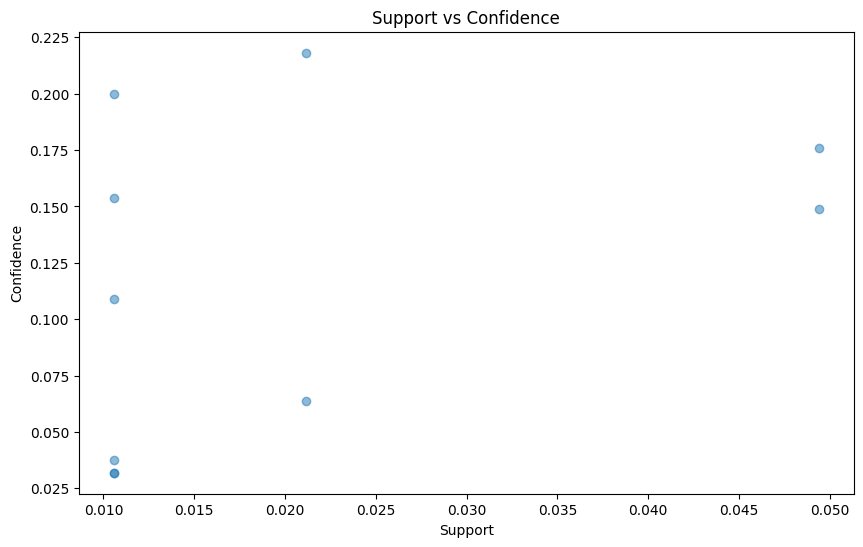

AttributeError: Can only use .dt accessor with datetimelike values

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

df = pd.read_csv("data-transaksi2.csv")


# Prepare the data for the Apriori algorithm
basket = (df.groupby(['Transaction', 'Item'])['Item']
          .count().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

# Convert values to 1 and 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Apply the Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)

# Plot 1: Support and Confidence of Items
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Extracting date for daily transactions
df['date'] = df['date_time'].dt.date

# Calculating daily unique transactions
daily_transactions = df.groupby('date')['Transaction'].nunique().reset_index()
daily_transactions.columns = ['date', 'unique_transactions']

# Apply Single Moving Average
window_size = 7
daily_transactions['moving_average'] = daily_transactions['unique_transactions'].rolling(window=window_size).mean()

# Plot 2: Single Moving Average of Transactions
plt.figure(figsize=(10, 6))
plt.plot(daily_transactions['date'], daily_transactions['unique_transactions'], label='Unique Transactions')
plt.plot(daily_transactions['date'], daily_transactions['moving_average'], label='Moving Average', color='orange')
plt.title('Single Moving Average of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

# Plot 3: Top 4 Items with Highest Sales Predictions
top_items = df['Item'].value_counts().head(4)
top_items.plot(kind='bar', figsize=(10, 6))
plt.title('Top 4 Items with Highest Sales Predictions')
plt.xlabel('Item')
plt.ylabel('Number of Sales')
plt.show()

# Predicting next month's demand for the top 5 items
df['year_month'] = df['date_time'].dt.to_period('M')
monthly_sales = df.groupby(['year_month', 'Item']).size().reset_index(name='count')
top_5_items = df['Item'].value_counts().head(5).index

predictions = {}
for item in top_5_items:
    item_sales = monthly_sales[monthly_sales['Item'] == item]
    avg_sales_per_month = item_sales['count'].mean()
    predictions[item] = avg_sales_per_month

# Plot 4: Predicted Demand for Next Month for Top 5 Items
plt.figure(figsize=(10, 6))
pd.Series(predictions).plot(kind='bar')
plt.title('Predicted Demand for Next Month for Top 5 Items')
plt.xlabel('Item')
plt.ylabel('Predicted Number of Sales')
plt.show()

# Display the results
frequent_itemsets, rules[['antecedents', 'consequents', 'support', 'confidence']], daily_transactions.head(20), top_items, predictions





In [31]:
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


           antecedents          consequents   support  confidence
0   (tempat_tidur_160)  (_rak_sepatu+kursi)  0.010582    0.031915
1  (_rak_sepatu+kursi)   (tempat_tidur_160)  0.010582    0.200000
2   (tempat_tidur_160)   (tempat_tidur_120)  0.021164    0.063830
3   (tempat_tidur_120)   (tempat_tidur_160)  0.021164    0.218182
4   (tempat_tidur_180)   (tempat_tidur_120)  0.010582    0.037736
5   (tempat_tidur_120)   (tempat_tidur_180)  0.010582    0.109091
6   (tempat_tidur_160)   (tempat_tidur_140)  0.010582    0.031915
7   (tempat_tidur_140)   (tempat_tidur_160)  0.010582    0.153846
8   (tempat_tidur_160)   (tempat_tidur_180)  0.049383    0.148936
9   (tempat_tidur_180)   (tempat_tidur_160)  0.049383    0.176101


In [8]:
import pandas as pd
from datetime import datetime, timedelta

# Baca file CSV
df = pd.read_csv('modified_data-transaksi2.csv')

# Konversi kolom 'date_time' menjadi datetime
df['date_time'] = pd.to_datetime(df['date_time'])

# Tentukan tanggal 3 bulan terakhir
end_date = pd.Timestamp(datetime.now())
start_date = end_date - pd.DateOffset(months=4)

# Filter data untuk 3 bulan terakhir
filtered_df = df[(df['date_time'] >= start_date) & (df['date_time'] <= end_date)]

# Filter baris yang berisi item yang dicari
items_of_interest = ['tempat_tidur_120', 'tempat_tidur_160']
filtered_items_df = filtered_df[filtered_df['Item'].isin(items_of_interest)]

# Kelompokkan data berdasarkan 'date_time' dan cari item yang ada di setiap tanggal
grouped = filtered_items_df.groupby('date_time')['Item'].apply(set)

# Temukan tanggal yang berisi kedua item
dates_with_both_items = grouped[grouped.apply(lambda items: all(item in items for item in items_of_interest))]

# Tampilkan hasil
print(dates_with_both_items)


date_time
2024-04-05    {tempat_tidur_160, tempat_tidur_120}
2024-04-25    {tempat_tidur_160, tempat_tidur_120}
2024-04-28    {tempat_tidur_160, tempat_tidur_120}
2024-05-01    {tempat_tidur_160, tempat_tidur_120}
2024-05-06    {tempat_tidur_160, tempat_tidur_120}
2024-05-10    {tempat_tidur_160, tempat_tidur_120}
2024-05-12    {tempat_tidur_160, tempat_tidur_120}
2024-05-15    {tempat_tidur_160, tempat_tidur_120}
2024-05-19    {tempat_tidur_160, tempat_tidur_120}
2024-05-20    {tempat_tidur_160, tempat_tidur_120}
2024-06-04    {tempat_tidur_160, tempat_tidur_120}
2024-06-10    {tempat_tidur_160, tempat_tidur_120}
2024-06-15    {tempat_tidur_160, tempat_tidur_120}
2024-06-22    {tempat_tidur_160, tempat_tidur_120}
2024-06-24    {tempat_tidur_160, tempat_tidur_120}
2024-06-27    {tempat_tidur_160, tempat_tidur_120}
2024-06-29    {tempat_tidur_160, tempat_tidur_120}
Name: Item, dtype: object


In [2]:
import pandas as pd

# Load your CSV file
file_path = 'data-transaksi2.csv'
data = pd.read_csv(file_path)

# Add the new 'qty' column with all values set to 1
data['qty'] = 1

# Save the modified dataframe to a new CSV file
modified_file_path = 'modified_data-transaksi2.csv'
data.to_csv(modified_file_path, index=False)
